## Introdução

Neste projeto, conduzimos uma análise de desempenho do setor de vendas de uma empresa fictícia de e-commerce, com foco no entendimento dos dados e tirada de insights que ajudem tomadas de decisões estratégicas por parte de suas lideranças. Foram realizadas etapas de entendimento, tratamentos dos dados, transformações e análises de vendas por categorias e localidades. 

*Além disso, o projeto será em duas partes, sendo esta análise via Python utilizando bibliotecas, SQL e plotagens de gráficos. A segunda parte será via powerBI com foco em uma dashboard para as lideranças, com KPIs e diversas métricas para fazermos análises interativas.*

## Contexto do projeto

Vamos explorar o cenário de uma empresa fictícia do ramo de e-commerce que atua nacionalmente com vendas online de diversos produtos. A companhia, diante de uma grande quantidade de pedidos e uma operação comercial em expansão, busca compreender melhor seus resultados de vendas, quais as marcas e produtos são mais rentáveis, e quais regiões mais dão retorno para ajustes em seu time de marketing.

A base de dados reflete pedidos realizados ao longo do tempo, contendo informações sobre valores monetários, categorias de produtos, localidades de vendas, datas de compra e outros. A partir dessa base rica em variáveis, o objetivo é conduzir uma análise que ofereça uma visão clara sobre a performance comercial da empresa, bem como subsidiar áreas como marketing, logística e planejamento estratégico com dados confiáveis.

A equipe executiva do e-commerce busca respostas para questões-chave como:
- Quais produtos ou categorias geram maior valor agregado?
- Como avaliar o desempenho dos vendedores de forma comparável?
- Existem regiões mais promissoras em termos de faturamento?
- Quanto do faturamento é comprometido com custos logísticos?

Diante disso, foi solicitado um estudo detalhado com base nos dados brutos de vendas, pedidos, produtos e vendedores, para identificar padrões, gargalos e oportunidades de melhoria. O resultado esperado é um conjunto de análises que deem suporte à estratégia de crescimento sustentável da empresa, e uma dashboard executiva que permita o acompanhamento contínuo desses indicadores.

*Como nosso projeto será em duas partes, abaixo estão as propostas para cada uma delas.*

#### Python
##### Análise de Performance Comercial
Nesta etapa, fomos contratados com o objetivo de avaliar o desempenho de vendas da empresa, com foco em produtos, faturamento e melhores regiões. A análise busca identificar as origens das receitas, entender os dados e analisar geograficamente a operação.


1. Top Produtos por Faturamento
    - Ranking dos produtos com maior valor total de vendas (agrupados por produto e marcas);
    - Cálculo de percentual de participação dos 10 maiores no total da receita.
2. Categorias com Maior Receita
    - Identificação das categorias com maior volume financeiro, permitindo entender quais áreas geram mais retorno.
3. Análise por condicao
    - Visualização da distribuição de vendas por condição do produto.
4. Análise geográfica por estado e região
    - Exploração do desempenho de vendas por estado e regiões do Brasil.
5. Custo Logístico Total (Frete)
    - Soma total de frete mensal e análise da diferença por lucro obtido.

#### Power BI
Nesta etapa, será construída uma dashboard interativa voltada para o time de gestão comercial e tomada de decisões estratégicas, com foco em indicadores de desempenho, análise sazonal, regional e por vendedor.

Nela teremos:
- Faturamento Total e Evolução Mensal
    - Eevolução do faturamento ao longo do tempo.
- Média de vendas por mês
    - Comparação de sazonalidade (melhores e piores meses).
- Análise de Vendedores
    - Total de vendas por vendedor.
- Comparativos mensais e por desempenho
    - Produto com maior retorno e desempenho.
- Mapa de Calor de Vendas por Estado
    - Entendimento da porcentagem de faturamento por estado.
- Percentual do frete sobre o faturamento 
    - Análise do comprometimento do frete em cima do lucro obtido 



## Códigos


### Bibliotecas

In [1]:
# Tratamento e visualização
import pandas as pd
import numpy as np

# Conexão e tratamento de erros
import mysql.connector
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine, text

# Visualização e análises
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Cores do projeto


In [2]:
cores = [
    '#023047',  # azulEscuro
    '#8ECAE6',  # azulClaro
    '#8ac543',  # verdeClaro
    '#FFB703',  # amarelo
    '#C51F3D',  # vermelho
    '#fe0000',  # laranja
    '#210B2C',  # roxo
    '#D8B4E2',  # rosa
    '#DCAB6B',  # marrom
    '#A29587'   # cinza
]

### Importação e tratamento de dados
Os dados utilizados neste projeto foram extraídos de um desafio proposto pela Alura e estão disponíveis em formato SQL. O conjunto de dados pode ser acessado por meio do seguinte link:  [Dump Bases de dados SQL](https://drive.google.com/file/d/1gvvTVYqdP7Yvo4SLAl4Mt6JtAUcH3SMJ/view).

##### Conexão com banco de dados

In [3]:
#Carregando as credenciais do arquivo .env
load_dotenv()

# Pegando as credenciais do ambiente
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
db_name = os.getenv("DB_NAME")

# Caminho dos dados
caminho_dump = "Material/dump-ecommerce202304191245.sql"

#Lendo o arquivo
with open(caminho_dump, 'r', encoding='utf-8') as f:
    sql_script = f.read()

# Conectando ao servidor MySQL
conn = mysql.connector.connect(
    host= host,
    user = user,
    password = password,
    database= db_name
)
cursor = conn.cursor()


# Executando as instruções do dump
statements = sql_script.split(';')
for stmt in statements:
    stmt = stmt.strip()
    if stmt:
        try:
            cursor.execute(stmt)
        except mysql.connector.Error as err:
            print(f'Erro ao executar instrução {stmt[:80]}...\n> {err}')

# Fechando a base de dados
conn.commit()
cursor.close()
conn.close()


print(f' Dump importado com sucesso! ')

 Dump importado com sucesso! 


In [4]:
# Criando a engine do SQLAlchemy
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{db_name}")

### Funções

In [5]:
# Função de consulta SQL
def sql_df(query):
    load_dotenv()
    engine = create_engine(
        f"mysql+mysqlconnector://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}"
    )
    with engine.connect() as conexao:
        resultado = conexao.execute(text(query))
        dados = resultado.fetchall()
    return pd.DataFrame(dados, columns=resultado.keys())

#### Visualizando as tabelas

In [6]:
# Tabelas disponíveis
query = "SHOW TABLES"
sql_df(query)

,Tables_in_ecommerce
0,itens_pedido
1,pedido
2,produto
3,vendedores


In [7]:
# Vendas do e-commerce
query = "SELECT * FROM itens_pedido"
sql_df(query)

,produto_id,pedido_id,quantidade,valor_unitario,valor_total,estado,frete,id_nf
0,41518,341.0,3.0,260.00,780.00,BR-BA,156.00,1.0
1,4307,1174.0,5.0,6175.00,30875.00,BR-RJ,6175.00,2.0
2,22407,1399.0,3.0,200.00,600.00,BR-PB,120.00,3.0
3,3820,1652.0,6.0,139.00,834.00,BR-DF,1668.00,4.0
4,29012,2470.0,3.0,525.00,1575.00,BR-BA,315.00,5.0
...,...,...,...,...,...,...,...,...
25052,100,64594.0,5.0,3900.00,19500.00,BR-RO,3900.00,25053.0
25053,3,64811.0,3.0,139.00,417.00,BR-MA,834.00,25054.0
25054,74,65274.0,2.0,130.00,260.00,BR-SE,52.00,25055.0
25055,74,67862.0,4.0,130.00,520.00,BR-RO,104.00,25056.0


In [8]:
# Produtos vendidos
query = "SELECT * FROM produto"
sql_df(query)

,produto_id,produto,preco,marca,sku,condicao
0,2706,Blusa Cinza,590.00,Mixed,297627,Usado
1,3451,Vestido Ombro Só,250.00,Lemon Cola,295317,Usado
2,3820,Shorts Jeans Tye Dye,139.00,Lezalez,252560,Usado
3,3829,Sneaker Monograma Bege,2630.00,Louis Vuitton,256175,Usado
4,3865,Bolsa Clássica Roxa,6500.00,Christian Dior,165834,Usado
...,...,...,...,...,...,...
200,100484,Calça Jeans Pantacourt,320.00,Sacada,279886,Usado
201,100932,Sapato Cetim Pink,3900.00,Christian Louboutin,304370,Usado
202,100939,Blusa Suede Caramelo,310.00,Dress&co,227144,Usado
203,100961,Vestido Preto Renda,480.00,Dress&co,175945,Usado


In [9]:
# Pedidos
query = "SELECT * FROM pedido"
sql_df(query)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,1,5292,2.0,2020-02-16,3456.00
1,3,29650,3.0,2020-02-01,720.00
2,9,18751,5.0,2021-02-04,5940.00
3,11,7871,3.0,2019-12-01,2520.00
4,21,2706,3.0,2020-01-03,2950.00
...,...,...,...,...,...
25051,139961,27546,4.0,2020-10-25,336.00
25052,139962,20029,3.0,2019-11-27,1176.00
25053,139964,25562,5.0,2020-01-22,640.00
25054,139980,48872,4.0,2020-04-18,120.00


Nesta tabela em questão, podemos ver que há um campo para o identificador do vendedor, porém, não há uma tabela de vendedores. 

Vamos ver quantos são o criaremos na base de dados:

In [10]:
query = '''
SELECT VENDEDOR_ID, COUNT(*) AS 'Quantidade de Vendas'
FROM PEDIDO
GROUP BY VENDEDOR_ID
'''
sql_df(query)

,VENDEDOR_ID,Quantidade de Vendas
0,2.0,5032
1,3.0,4840
2,5.0,5283
3,NaN,529
4,1.0,5167
5,4.0,4205


Ao total temos 5 vendedores, sendo 1 soma de vendas não identificadas, vamos ajustar os valores nulos para Não Identificado e criar uma tabela vendedores com todos os valores.

In [11]:
# Ajustando o valor
query_ajuste = '''
UPDATE PEDIDO
SET VENDEDOR_ID = 0         /*...Alterando p 0 e depois será Não Identificado...*/
WHERE VENDEDOR_ID IS NULL
'''

#Executando o update
with engine.connect() as conexao:
    conexao.execute(text(query_ajuste))

C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RemovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  # Remove the CWD from sys.path while we load stuff.


In [12]:
query_criar_tabela = text('''
CREATE TABLE IF NOT EXISTS VENDEDORES (
vendedor_id INT PRIMARY KEY,
NOME VARCHAR(255)
)
'''
)

query_inserçao_vendedores = text('''
INSERT IGNORE INTO VENDEDORES (vendedor_id, NOME) VALUES
(0, 'Não Identificado'),
(1, 'Pedro'),
(2, 'Beatriz'),
(3, 'Raul'),
(4, 'Amanda'),
(5, 'Gabriela')
'''
)

#Executando ambas
with engine.begin() as conexao:
    conexao.execute(query_criar_tabela)
    conexao.execute(query_inserçao_vendedores)

In [13]:
query = '''SELECT * FROM Vendedores'''
sql_df(query)

,vendedor_id,NOME
0,0,Não Identificado
1,1,Pedro
2,2,Beatriz
3,3,Raul
4,4,Amanda
5,5,Gabriela
6,0,Não Identificado
7,1,Pedro
8,2,Beatriz
9,3,Raul


#### Bases de dados inseridas e vistas, vamos agora entender cada uma de suas variáveis:
*Obs: Campos marcados com * são chaves utilizadas para relacionar tabelas entre si.*

- **Itens_pedido (Tabela Fato - Detalhamento de cada pedido, valores, fretes, estado, etc)**
    - **produto_id*** - Identificador do produto; chave utilizada para relacionarmos com a tabela **Produto**
    - **pedido_id*** - Identificador do pedido; chave utilizada para relacionarmos com a tabela **Pedido**
    - **quantidade** - Quantidade de pedidos;
    - **valor_unitario** - Valor por unidade do pedido;
    - **valor_total** - Valor total do pedido;
    - **estado** - Estado para onde o pedido foi enviado;
    - **frete** - Valor do frete cobrado para o envio do produto;
    - **id_nf** - Identificador da nota fiscal do pedido.

- **Produto (Tabela Dimensão - Descrição do produto, marca, condições, etc)**
    - **produto_id*** - Identificador do produto; chave utilizada para relacionarmos com as tabelas **Itens_pedido** e **Pedido**
    - **produto** - Nome do produto;
    - **preço** - Preço do produto;
    - **marca** - Marca do prodto;
    - **sku** - Identificador do produto no estoque;
    - **condicao** - Condição do produto;

- **Pedido (Tabela Dimensão - Caso híbrido, mas trataremos a estrutura como uma dimensão auxiliar já que contém a data e o vínculo com vendedores e produtos)**
    - **pedido_id** - Identificador do pedido;
    - **produto_id*** - Identificador do produto; chave utilizada para relacionarmos com a tabela **Produto**
    - **vendedor_id*** - Identificador do vendedor; chave utilizada para relacionarmos com a tabela **Vendedores**
    - **data_compra** - Data em que a compra foi realizada;
    - **total** - Valor total da compra.

- **Vendedores (Tabela Dimensão - Dados descritivos dos vendedores)**
    - **vendedor_id*** - Identificador do vendedor; chave utilizada para relacionarmos com a tabela **Pedido**
    - **nome** - Nome do vendedor.

### Tratamento de dados

#### Dados nulos, vazios ou duplicados

In [14]:
# Conferindo os dados nulos das colunas em cada tabela para tratamento

for tabela in ['ITENS_PEDIDO', 'PRODUTO', 'PEDIDO', 'VENDEDORES']:
    print(f"Tabela: {tabela}")
    df = sql_df(f"SELECT * FROM {tabela}")

    resumo = []
    for col in df.columns:
        nulos = df[col].isna().sum()
        vazios = (df[col] == "").sum()
        duplicados = df[col].duplicated().sum()
        resumo.append([col, nulos, vazios, duplicados])

    df_resumo = pd.DataFrame(resumo, columns=['Coluna', 'Qtd. Nulos', 'Qtd. Vazios', 'Qtd. Duplicados'])
    display(df_resumo)

Tabela: ITENS_PEDIDO


,Coluna,Qtd. Nulos,Qtd. Vazios,Qtd. Duplicados
0,produto_id,0,0,24795
1,pedido_id,1,0,0
2,quantidade,1,0,25050
3,valor_unitario,0,0,24972
4,valor_total,0,0,24702
5,estado,0,1,25029
6,frete,0,0,24705
7,id_nf,1,0,0


Tabela: PRODUTO


,Coluna,Qtd. Nulos,Qtd. Vazios,Qtd. Duplicados
0,produto_id,0,0,0
1,produto,0,0,4
2,preco,0,0,120
3,marca,0,0,88
4,sku,0,0,0
5,condicao,0,0,202


Tabela: PEDIDO


,Coluna,Qtd. Nulos,Qtd. Vazios,Qtd. Duplicados
0,pedido_id,0,0,0
1,produto_id,0,0,24794
2,vendedor_id,0,0,25050
3,data_compra,0,0,24276
4,total,0,0,24702


Tabela: VENDEDORES


,Coluna,Qtd. Nulos,Qtd. Vazios,Qtd. Duplicados
0,vendedor_id,0,0,24
1,NOME,0,0,24


#### Conclusões
- **Dados nulos**: trataremos os valores nulos por coluna e tabela;
- **Dados vazios**: temos apenas 1 entrada vazia na coluna "Estado" que será dropada da tabela "Itens_pedido";
- **Dados duplicados**: temos diversos duplicados, porém, onde esses dados não interferem em nossa análise, visto que eles vêm dos produtos vendidos, marcas, condições, etc. O importante nessa situação é o "pedido_id", "id_nf" e "produto_id" das tabelas **ITENS_PEDIDO, PRODUTO e PEDIDO** e, nestes não há nenhum duplicado.


In [15]:
### Dado vazio da coluna "Estado" em "Itens_pedido"
with engine.begin() as conexao:
    conexao.execute(text("DELETE FROM ITENS_PEDIDO WHERE estado = '';"))

In [16]:
### Dados nulos em "Itens_pedido"
#Nesse caso, como temos apenas 1 entrada em 3 colunas diferentes em uma tabela que contém 25057 entradas, droparemos as 3 entradas já que a quantidade não afetará nossas análises
with engine.begin() as conexao:
    conexao.execute(text("""
        DELETE FROM ITENS_PEDIDO
        WHERE pedido_id IS NULL OR quantidade IS NULL OR id_nf IS NULL;
        """
    ))

In [17]:
### Dados nulos em "Pedido"
# Parecido com o que fizemos mais para acima, vamos alterar os dados nulos para "0". Estes 0's serão as vendas dos vendedores não identificados, alteração já feita na tabela Vendedores.
with engine.begin() as conexao:
    conexao.execute(text("""
        UPDATE PEDIDO
        SET vendedor_id = 0
        WHERE vendedor_id IS NULL;
        """
    ))

#### Conferindo se os dados foram tratados corretamente

In [18]:
for tabela in ['ITENS_PEDIDO', 'PRODUTO', 'PEDIDO', 'VENDEDORES']:
    print(f"Tabela: {tabela}")
    df = sql_df(f"SELECT * FROM {tabela}")

    resumo = []
    for col in df.columns:
        nulos = df[col].isna().sum()
        vazios = (df[col] == "").sum()
        duplicados = df[col].duplicated().sum()
        resumo.append([col, nulos, vazios, duplicados])

    df_resumo = pd.DataFrame(resumo, columns=['Coluna', 'Qtd. Nulos', 'Qtd. Vazios', 'Qtd. Duplicados'])
    display(df_resumo)

Tabela: ITENS_PEDIDO


,Coluna,Qtd. Nulos,Qtd. Vazios,Qtd. Duplicados
0,produto_id,0,0,24794
1,pedido_id,0,0,0
2,quantidade,0,0,25050
3,valor_unitario,0,0,24971
4,valor_total,0,0,24702
5,estado,0,0,25029
6,frete,0,0,24705
7,id_nf,0,0,0


Tabela: PRODUTO


,Coluna,Qtd. Nulos,Qtd. Vazios,Qtd. Duplicados
0,produto_id,0,0,0
1,produto,0,0,4
2,preco,0,0,120
3,marca,0,0,88
4,sku,0,0,0
5,condicao,0,0,202


Tabela: PEDIDO


,Coluna,Qtd. Nulos,Qtd. Vazios,Qtd. Duplicados
0,pedido_id,0,0,0
1,produto_id,0,0,24794
2,vendedor_id,0,0,25050
3,data_compra,0,0,24276
4,total,0,0,24702


Tabela: VENDEDORES


,Coluna,Qtd. Nulos,Qtd. Vazios,Qtd. Duplicados
0,vendedor_id,0,0,24
1,NOME,0,0,24


#### Tipagem dos dados
Com os dados vazios, nulos e duplicados tratados, vamos ajustar a tipagem deles para partirmos para as análises.

In [19]:
for tabela in ['ITENS_PEDIDO', 'PRODUTO', 'PEDIDO', 'VENDEDORES']:
    print(f'Tabela: {tabela}')
    df = sql_df(f'SELECT * FROM {tabela}')

    tipos = pd.DataFrame(df.dtypes, columns=['Tipo'])
    tipos.index.name = 'Coluna'
    display(tipos.reset_index())

Tabela: ITENS_PEDIDO


,Coluna,Tipo
0,produto_id,int64
1,pedido_id,int64
2,quantidade,int64
3,valor_unitario,object
4,valor_total,object
5,estado,object
6,frete,object
7,id_nf,int64


Tabela: PRODUTO


,Coluna,Tipo
0,produto_id,int64
1,produto,object
2,preco,object
3,marca,object
4,sku,object
5,condicao,object


Tabela: PEDIDO


,Coluna,Tipo
0,pedido_id,int64
1,produto_id,int64
2,vendedor_id,int64
3,data_compra,object
4,total,object


Tabela: VENDEDORES


,Coluna,Tipo
0,vendedor_id,int64
1,NOME,object


#### Ajustaremos as colunas:
- **ITENS_PEDIDO**:
    - valor_unitario - de object para float64;
    - valor_total - de object para float64;
    - frete - de object para float64.

- **PRODUTO**:
    - preco - de object para float64;
    - sku - de object para float64.

- **PEDIDO**:
    - data_compra - de object para datetime e formação para modelo brasileiro;
    - total - de object para float64.

In [20]:
# Como faremos as tratativas usando pandas, vamos salvar as bases de dados em tabelas para também exportarmos posteriormente.
df_itensPedido = pd.DataFrame(sql_df('SELECT * FROM ITENS_PEDIDO'))
df_produto = pd.DataFrame(sql_df('SELECT * FROM PRODUTO'))
df_pedido = pd.DataFrame(sql_df('SELECT * FROM PEDIDO'))
df_vendedores = pd.DataFrame(sql_df('SELECT * FROM VENDEDORES'))

In [21]:
conversao_itensPedidos = ['valor_unitario', 'valor_total', 'frete']

for col in conversao_itensPedidos:
    df_itensPedido[col] = df_itensPedido[col].astype('float64')

In [22]:
conversao_produto = ['preco', 'sku']

for col in conversao_produto:
    df_produto[col] = df_produto[col].astype('float64')

In [23]:
#Em Pedido faremos separadamente
df_pedido['total'] = df_pedido['total'].astype('float64')
df_pedido['data_compra'] = pd.to_datetime(df_pedido['data_compra'], format='%Y-%m-%d')
df_pedido['data_compra'] = df_pedido['data_compra'].dt.strftime('%d/%m/%Y')

In [24]:
# Conferindo as correções
for nome_df, df in {
    'df_itensPedido': df_itensPedido,
    'df_produto': df_produto,
    'df_pedido': df_pedido,
    'df_vendedores': df_vendedores
}.items():
    print(f'Tipagem - {nome_df}')
    tipos = pd.DataFrame(df.dtypes, columns=['Tipo'])
    tipos.index.name = 'Coluna'
    display(tipos.reset_index())

Tipagem - df_itensPedido


,Coluna,Tipo
0,produto_id,int64
1,pedido_id,int64
2,quantidade,int64
3,valor_unitario,float64
4,valor_total,float64
5,estado,object
6,frete,float64
7,id_nf,int64


Tipagem - df_produto


,Coluna,Tipo
0,produto_id,int64
1,produto,object
2,preco,float64
3,marca,object
4,sku,float64
5,condicao,object


Tipagem - df_pedido


,Coluna,Tipo
0,pedido_id,int64
1,produto_id,int64
2,vendedor_id,int64
3,data_compra,object
4,total,float64


Tipagem - df_vendedores


,Coluna,Tipo
0,vendedor_id,int64
1,NOME,object


#### Com o tratamento feito, vamos exportar as tabelas para SQL novamente

In [25]:
df_itensPedido.to_sql('itens_pedido', con=engine, index=False, if_exists='replace')
df_produto.to_sql('produto', con=engine, index=False, if_exists='replace')
df_pedido.to_sql('pedido', con=engine, index=False, if_exists='replace')
df_vendedores.to_sql('vendedores', con=engine, index=False, if_exists='replace')

### Vamos as análises

1. Top Produtos por Faturamento
    - Ranking dos produtos com maior valor total de vendas (agrupados por produto e marcas);
    - Cálculo de percentual de participação dos 10 maiores no total da receita.


- Para chegarmos aos top produtos por faturamento, vamos montar um ranking com os 10 com maior valor_total agregado por produto, além disso, veremos o percentual desses 10 no total da receita

In [26]:
query = '''
SELECT COUNT(DISTINCT produto_id) AS Total_Produtos
FROM ITENS_PEDIDO;
'''
sql_df(query)

,Total_Produtos
0,262


In [27]:
query = '''
WITH top_10 AS (
    SELECT 
        PRODUTO.produto AS 'Produto',
        SUM(ITENS_PEDIDO.valor_total) AS 'Faturamento',
        ROUND(
            (SUM(ITENS_PEDIDO.valor_total) / 
             (SELECT SUM(valor_total) FROM ITENS_PEDIDO)) * 100, 2
        ) AS 'Percentual Receita Total'
    FROM ITENS_PEDIDO
    JOIN PRODUTO ON ITENS_PEDIDO.produto_id = PRODUTO.produto_id
    GROUP BY ITENS_PEDIDO.produto_id, PRODUTO.produto
    ORDER BY Faturamento DESC
    LIMIT 10
)

SELECT * FROM top_10

UNION ALL

SELECT 
    'Total Correspondente' AS Produto,
    SUM(Faturamento),
    ROUND(SUM(`Percentual Receita Total`), 2)
FROM top_10;
'''

df_comparativo_produtos = sql_df(query)
sql_df(query)

,Produto,Faturamento,Percentual Receita Total
0,Bolsa Clássica Roxa,2886000.0,6.17
1,Bolsa Intrecciato Caramelo,2260050.0,4.83
2,Vestido Longo Preto,1822800.0,3.90
3,Saia Couro Tijolo,1808800.0,3.87
4,Sapato Cetim Pink,1797900.0,3.85
5,Bolsa Coral Saco,1488000.0,3.18
6,Scarpin Bege Textura,1191400.0,2.55
7,Óculos Redondo Purple,1157000.0,2.47
8,Sneaker Monograma Bege,1099340.0,2.35
9,Vestido Amarelo Laço,646800.0,1.38


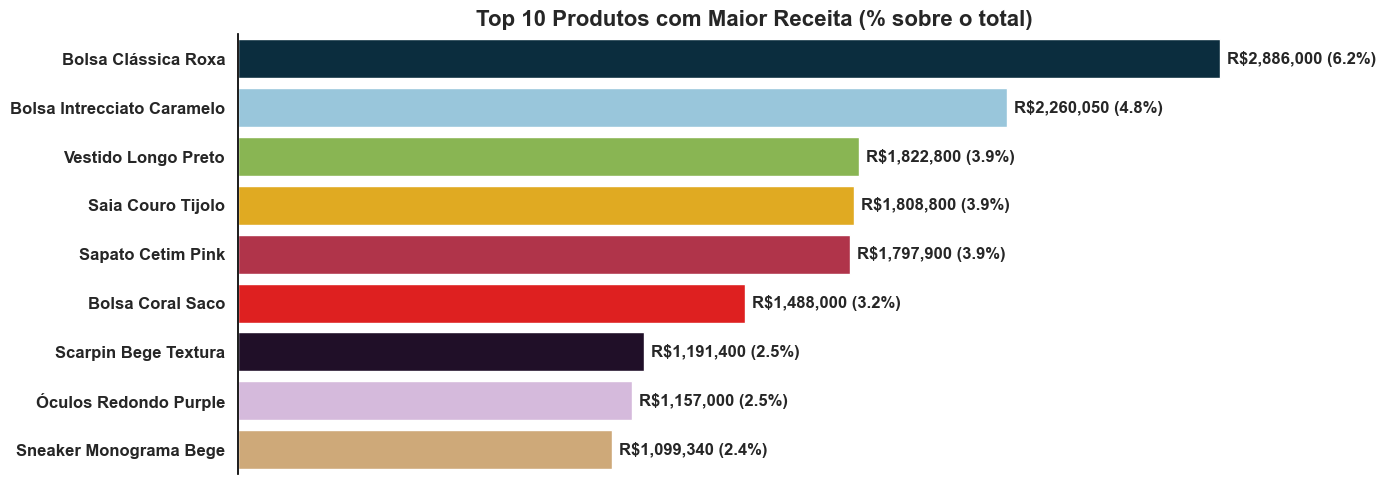

In [42]:
# Para melhorar a visualização, vamos plotar as informações
plt.figure(figsize=(14, 5))
sns.set(style='whitegrid')

ax = sns.barplot(data=df_comparativo_produtos.iloc[0:9], orient='h', x='Faturamento', y='Produto', palette=cores)

#Titulos e eixos
plt.title('Top 10 Produtos com Maior Receita (% sobre o total)', fontsize=16, fontweight='bold')
plt.xlabel('')
ax.set_xticks([])
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12,fontweight='bold')
plt.ylabel('')

# Anotando os valores de faturamento e percentuais
for i, c in enumerate(ax.patches):
    valor_abs = c.get_width()
    valor_pct = df_comparativo_produtos['Percentual Receita Total'].iloc[i]
    ax.annotate(
        f'R${valor_abs:,.0f} ({valor_pct:.1f}%)',
        (valor_abs, c.get_y() + c.get_height() / 2),
        ha='left',
        va='center',
        fontsize=12,
        fontweight='bold',
        xytext=(5, 0),
        textcoords='offset points'
    )


for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')



plt.tight_layout()
plt.show()

#### Desempenho dos principais produtos
Dos 262 produtos únicos em estoque, os **10 mais vendidos representam 34% do faturamento bruto**. Essa concentração destaca a força de parte do portfólio, mas também acende o alerta sobre os itens de baixa performance. *Avaliar esses produtos menos vendidos pode revelar oportunidades para ajustes estratégicos que ampliem a receita total e otimizem a gestão do mix de vendas*.


2. Marcas de Maior Receita
    - Identificação das marcas com maior volume financeiro, permitindo entender quais geram mais retorno.
- Entender as marcas mais rentáveis e a representatividade delas em relação ao total de vendas

In [29]:
# por marca
query = '''
WITH top_10_marcas AS (
    SELECT 
        PRODUTO.marca AS 'Marca',
        SUM(ITENS_PEDIDO.valor_total) AS 'Faturamento',
        ROUND(
            (SUM(ITENS_PEDIDO.valor_total) / 
             (SELECT SUM(valor_total) FROM ITENS_PEDIDO)) * 100, 2
        ) AS 'Percentual Receita',
        COUNT(DISTINCT ITENS_PEDIDO.pedido_id) AS 'Qtd Pedidos',
        ROUND(
            (COUNT(DISTINCT ITENS_PEDIDO.pedido_id) / 
             (SELECT COUNT(DISTINCT pedido_id) FROM ITENS_PEDIDO)) * 100, 2
        ) AS 'Percentual Pedidos'
    FROM ITENS_PEDIDO
    JOIN PRODUTO ON ITENS_PEDIDO.produto_id = PRODUTO.produto_id
    GROUP BY PRODUTO.marca
    ORDER BY Faturamento DESC
    LIMIT 10
)

SELECT * FROM top_10_marcas

UNION ALL

SELECT 
    'Total Correspondente' AS Marca,
    SUM(Faturamento),
    ROUND(SUM(`Percentual Receita`), 2),
    SUM(`Qtd Pedidos`),
    ROUND(SUM(`Percentual Pedidos`), 2)
FROM top_10_marcas;
'''


df_comparativo_categorias = sql_df(query)
sql_df(query)

,Marca,Faturamento,Percentual Receita,Qtd Pedidos,Percentual Pedidos
0,Mixed,4680672.0,10.01,1700,6.78
1,Christian Dior,3194250.0,6.83,238,0.95
2,Bottega Veneta,2260050.0,4.83,103,0.41
3,Barbara Bela,1822800.0,3.90,124,0.49
4,Christian Louboutin,1797900.0,3.85,133,0.53
5,Givenchy,1488000.0,3.18,110,0.44
6,Zara,1474894.0,3.15,2762,11.02
7,Animale,1406123.0,3.01,1143,4.56
8,Jimmy Choo,1191400.0,2.55,122,0.49
9,Prada,1157000.0,2.47,138,0.55


In [30]:
query = '''
WITH top_10_marcas AS (
    SELECT 
        PRODUTO.marca AS Marca,
        SUM(ITENS_PEDIDO.valor_total) AS Faturamento,
        ROW_NUMBER() OVER (ORDER BY SUM(ITENS_PEDIDO.valor_total) DESC) AS ordem
    FROM ITENS_PEDIDO
    JOIN PRODUTO ON ITENS_PEDIDO.produto_id = PRODUTO.produto_id
    GROUP BY PRODUTO.marca
    ORDER BY Faturamento DESC
    LIMIT 10
)

SELECT 
    top_10_marcas.Marca,
    COUNT(DISTINCT PRODUTO.produto_id) AS Quantidade_Produtos,
    top_10_marcas.ordem
FROM top_10_marcas
JOIN PRODUTO ON PRODUTO.marca = top_10_marcas.Marca
GROUP BY top_10_marcas.Marca, top_10_marcas.ordem
ORDER BY top_10_marcas.ordem;
'''

sql_df(query)

,Marca,Quantidade_Produtos,ordem
0,Mixed,14,1
1,Christian Dior,2,2
2,Bottega Veneta,1,3
3,Barbara Bela,1,4
4,Christian Louboutin,1,5
5,Givenchy,1,6
6,Zara,23,7
7,Animale,9,8
8,Jimmy Choo,1,9
9,Prada,1,10


In [31]:
query = '''
SELECT COUNT(DISTINCT Marca) AS "Total Marcas"
FROM PRODUTO;
'''
sql_df(query)

,Total Marcas
0,116


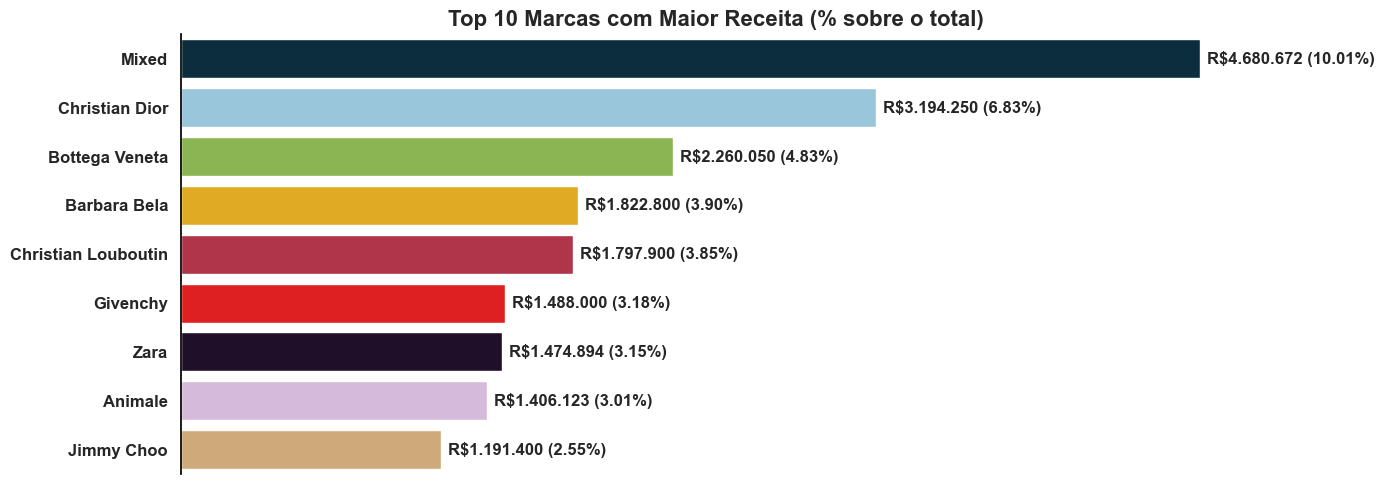

In [32]:
# Melhorando a visualização
plt.figure(figsize=(14, 5))
sns.set(style='whitegrid')

ax = sns.barplot(data=df_comparativo_categorias.iloc[0:9], orient='h', x='Faturamento', y='Marca', palette=cores)

#Titulos e eixos
plt.title('Top 10 Marcas com Maior Receita (% sobre o total)', fontsize=16, fontweight='bold')
plt.xlabel('')
ax.set_xticks([])
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')
plt.ylabel('')

# Anotando os valores de faturamento e percentuais
for i, c in enumerate(ax.patches):
    valor_abs = c.get_width()
    valor_pct = df_comparativo_categorias['Percentual Receita'].iloc[i]
    ax.annotate(
        f'R${valor_abs:,.0f} ({valor_pct:.2f}%)'.replace(',','.'),
        (valor_abs, c.get_y() + c.get_height() / 2),
        ha='left',
        va='center',
        fontsize=12,
        fontweight='bold',
        xytext=(5, 0),
        textcoords='offset points'
    )


for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')

plt.tight_layout()
plt.show()

#### Desempenho das principais marcas
Assim como ocorre com os produtos, observamos que poucas marcas concentram a maior parte do faturamento, mesmo com um portfólio significativamente mais amplo. Isso **evidencia a relevância de algumas marcas no e-commerce**, mas também levanta um ponto de atenção: **por que parte significativa do catálogo não converte?**

Uma sugestão seria **avaliar marcas com baixa performance**, entendendo se há questões ligadas a preço, reputação ou falta de interesse do público. Para isso, pode-se aplicar um questionário direto no site ou por e-mail, focado em visitantes que acessaram essas marcas, mas não efetuaram a compra.

3. Análise por condicao
    - Visualização da distribuição de vendas por condição do produto.
- Vamos entender qual condição é a mais rentável para nossa operação.

In [33]:
query = '''
SELECT 
    PRODUTO.condicao AS 'Condição', 
    SUM(ITENS_PEDIDO.valor_total) AS 'Faturamento',
    ROUND(
        (SUM(ITENS_PEDIDO.valor_total) / 
        (SELECT SUM(valor_total) FROM ITENS_PEDIDO)) * 100, 2
    ) AS 'Percentual Receita'
FROM ITENS_PEDIDO
JOIN PRODUTO ON ITENS_PEDIDO.produto_id = PRODUTO.produto_id
GROUP BY PRODUTO.condicao
ORDER BY Faturamento DESC;
'''
df_comparativo_condicao = sql_df(query)
sql_df(query)

,Condição,Faturamento,Percentual Receita
0,Usado,40092538.0,85.76
1,Novo com etiqueta,4820950.0,10.31
2,Novo sem etiqueta,1573024.0,3.36


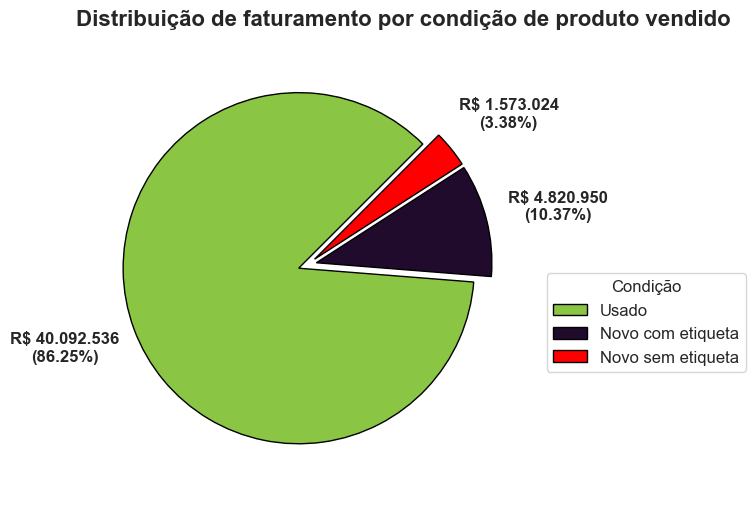

In [34]:
# Comparativo de faturamento de acordo com a condição do produto

#Função p visualização de valores + percentual
def pct_formatado(pct, allvals):
    valor = int(round(pct/100.*sum(allvals)))
    return f'R$ {valor:,.0f}\n({pct:.2f}%)'.replace(',','.')

#Plot
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
explode = [0.05] * len(df_comparativo_condicao) #explode p separar um pouco as fatias e melhorar a visualização

wedges, texts, autotexts = plt.pie(
    df_comparativo_condicao['Faturamento'],
    labels=None,
    autopct=lambda pct: pct_formatado(pct, df_comparativo_condicao['Faturamento']),
    startangle=45,
    explode=explode,
    colors=(cores[2], cores[6], cores[5]),
    wedgeprops=dict(edgecolor='black'),
    textprops={'fontsize':12, 'weight':'bold'},
    radius=0.95
)

# Posiciona os textos (autotexts) para fora
for i, a in enumerate(autotexts):
    ang = (wedges[i].theta2 + wedges[i].theta1)/2.0
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    a.set_position((1.4*x, 1.3*y))  # distância externa
    a.set_ha('center')
    a.set_va('center')
    a.set_fontsize(12)
    a.set_fontweight('bold')


plt.legend(
    labels=df_comparativo_condicao['Condição'],
    loc='best',
    bbox_to_anchor=(1.0, 0.5),
    title='Condição',
    fontsize=12
)


#Título e labels
plt.title('Distribuição de faturamento por condição de produto vendido', fontsize=16, fontweight='bold', loc='left')
plt.show()

#### Desempenho condicional
A análise do faturamento por condição dos produtos revela que 86% da receita é proveniente de itens usados. Apesar da presença de produtos novos no catálogo, a **predominância das vendas de usados indica uma forte identificação do público-alvo com essa categoria**.

Esse comportamento reforça a necessidade de manter um estoque robusto de produtos usados, ao mesmo tempo em que abre espaço para **avaliar estratégias de promoção ou reposicionamento dos itens novos** para ampliar a participação no faturamento.

4. Análise geográfica por estado e região
    - Exploração do desempenho de vendas por estado e regiões do Brasil.
- Quais regiões tem mais ou menos retorno?

In [35]:
query = '''
SELECT 
    estado AS 'Estado',
    SUM(valor_total) AS 'Faturamento',
    COUNT(DISTINCT pedido_id) AS 'Qtd Pedidos'
FROM ITENS_PEDIDO
GROUP BY estado
ORDER BY Faturamento DESC;
'''
df_comparativo_estados = sql_df(query)
sql_df(query)

,Estado,Faturamento,Qtd Pedidos
0,BR-AL,1947914.0,947
1,BR-PE,1918537.0,951
2,BR-SC,1876949.0,915
3,BR-AP,1876521.0,897
4,BR-CE,1866421.0,901
5,BR-MA,1866358.0,993
6,BR-GO,1833821.0,950
7,BR-PB,1810008.0,936
8,BR-SP,1781060.0,905
9,BR-MT,1737168.0,958


In [36]:
# Como vimos a entrada de estado incorreta 'BR-BR-RR', vamos ajustá-lo e também, os nomes dos estados para tirar o BR antes de cada já que vendemos apenas internamente.
#Além disso, para melhorar a visualização no treemap, vamos incluir as regiões de cada estado

#Tirada dos 'BR-' antes de cada estado
query_update_estados = '''
UPDATE ITENS_PEDIDO
SET ESTADO = REPLACE(ESTADO, 'BR-', '')
'''
# Criação da coluna Região
query_update_coluna_regioes = '''
ALTER TABLE ITENS_PEDIDO ADD COLUMN REGIAO TEXT;
'''

#Setando os valores de Região
query_update_regioes = '''
UPDATE ITENS_PEDIDO
SET REGIAO = CASE
    WHEN ESTADO IN ('SP', 'RJ', 'MG', 'ES') THEN 'Sudeste'
    WHEN ESTADO IN ('PR', 'SC', 'RS') THEN 'Sul'
    WHEN ESTADO IN ('DF', 'GO', 'MT', 'MS') THEN 'Centro-Oeste'
    WHEN ESTADO IN ('BA', 'SE', 'AL', 'PE', 'PB', 'RN', 'CE', 'PI', 'MA') THEN 'Nordeste'
    WHEN ESTADO IN ('AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC') THEN 'Norte'
    ELSE 'Outros'
END
'''

with engine.connect() as conexao:
    conexao.execute(text(query_update_estados))
    conexao.execute(text(query_update_coluna_regioes))
    conexao.execute(text(query_update_regioes))

In [37]:
#Query da análise de estados
query = '''
WITH Total AS (
    SELECT SUM(valor_total) AS Faturamento_Total
    FROM ITENS_PEDIDO
)

SELECT 
    estado AS 'Estado',
    regiao AS 'Regiao',
    SUM(valor_total) AS 'Faturamento',
    COUNT(DISTINCT pedido_id) AS 'Qtd Pedidos',
    ROUND(SUM(valor_total) * 100.0 / (SELECT Faturamento_Total FROM Total), 2) AS 'Percentual Faturamento Total'
FROM ITENS_PEDIDO
GROUP BY Estado, Regiao
ORDER BY Faturamento DESC;
'''
df_comparativo_estados = sql_df(query)
sql_df(query)

,Estado,Regiao,Faturamento,Qtd Pedidos,Percentual Faturamento Total
0,AL,Nordeste,1947914.0,947,4.17
1,PE,Nordeste,1918537.0,951,4.10
2,SC,Sul,1876949.0,915,4.01
3,AP,Norte,1876521.0,897,4.01
4,CE,Nordeste,1866421.0,901,3.99
5,MA,Nordeste,1866358.0,993,3.99
6,GO,Centro-Oeste,1833821.0,950,3.92
7,PB,Nordeste,1810008.0,936,3.87
8,SP,Sudeste,1781060.0,905,3.81
9,MT,Centro-Oeste,1737168.0,958,3.72


In [38]:
# Agora que ajustamos os estados, vamos criar um novo dataframe separado pelas regiões para melhorar a visualização
query='''
WITH Total AS (
    SELECT SUM(valor_total) AS Faturamento_Total
    FROM ITENS_PEDIDO
)
SELECT 
    CASE 
        WHEN estado IN ('SP', 'RJ', 'MG', 'ES') THEN 'Sudeste'
        WHEN estado IN ('PR', 'SC', 'RS') THEN 'Sul'
        WHEN estado IN ('DF', 'GO', 'MT', 'MS') THEN 'Centro-Oeste'
        WHEN estado IN ('BA', 'SE', 'AL', 'PE', 'PB', 'RN', 'CE', 'PI', 'MA') THEN 'Nordeste'
        WHEN estado IN ('AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC') THEN 'Norte'
        ELSE 'Outros'
    END AS 'Região',
    SUM(valor_total) AS 'Faturamento',
    ROUND(SUM(valor_total) * 100.0 / (SELECT Faturamento_Total FROM Total), 2) AS 'Percentual Faturamento Total',
    COUNT(DISTINCT pedido_id) AS 'Qtd Pedidos'
FROM ITENS_PEDIDO
GROUP BY Região
ORDER BY Faturamento DESC;
'''

df_comparativo_regioes = sql_df(query)
sql_df(query)

,Região,Faturamento,Percentual Faturamento Total,Qtd Pedidos
0,Nordeste,16225186.0,34.71,8456
1,Norte,11642920.0,24.91,6380
2,Sudeste,6824476.0,14.60,3691
3,Centro-Oeste,6809368.0,14.57,3763
4,Sul,5247325.0,11.22,2766


In [39]:
#Ajuste de cores
regioes = df_comparativo_regioes['Região'].unique()
mapa_cores = dict(zip(regioes, cores[1:5]))

#Plotagem
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
fig = px.treemap(
    df_comparativo_regioes,
    path=[px.Constant('Faturamento'), 'Região'], 
    values='Faturamento', 
    custom_data=['Região', 'Faturamento', 'Percentual Faturamento Total'],
    color='Região',
    color_discrete_map=mapa_cores
)

#Estilização
fig.update_layout(
    title=dict(
        text='Distribuição de Faturamento por Região',
        font=dict(size=22, family='Arial Black', color='black'),
        x=0.32,
        xanchor='left'
    )
)

fig.update_traces(
    textfont=dict(size=18, color='black'),
    hovertemplate=
        '<b>Região: %{customdata[0]}<b><br>' +
        'Faturamento: R$ %{customdata[1]:,.0f}<b><br>' +
        'Percentual p/ Faturamento Total: %{customdata[2]}<b>%<extra></extra>'  # 👈 Novo campo exibido
)

fig.show()

<Figure size 800x600 with 0 Axes>

#### Desempenho por Região

A análise geográfica revela que o **Nordeste é responsável por 34% do faturamento total**, superando individualmente as regiões Centro-Oeste e Sul somadas. Esse destaque reforça a importância de **direcionar ações específicas de marketing** e comunicação voltadas para o público e a linguagem locais, **potencializando ainda mais os resultados na região**.

5. Custo Logístico Total (Frete)
    - Soma total de frete mensal e análise da diferença por lucro obtido.
- Vamos entendere os custos de frete de cada região e como elas impactam em nosso faturamento.

In [40]:
query = '''
SELECT
    estado AS Estado,
    REGIAO AS Regiao,
    SUM(valor_total) AS Faturamento,
    SUM(frete) AS "Total Frete Regiao",
    SUM(valor_total) - SUM(frete) AS "Lucro Bruto (Fat - Frete)"
FROM ITENS_PEDIDO
GROUP BY estado, regiao
ORDER BY Faturamento DESC;
'''
df_comparativo_lucroXfrete = sql_df(query)
sql_df(query)


,Estado,Regiao,Faturamento,Total Frete Regiao,Lucro Bruto (Fat - Frete)
0,AL,Nordeste,1947914.0,516607.0,1431307.0
1,PE,Nordeste,1918537.0,513005.0,1405532.0
2,SC,Sul,1876949.0,489481.0,1387468.0
3,AP,Norte,1876521.0,496662.0,1379859.0
4,CE,Nordeste,1866421.0,527987.0,1338434.0
5,MA,Nordeste,1866358.0,576317.0,1290041.0
6,GO,Centro-Oeste,1833821.0,505348.0,1328473.0
7,PB,Nordeste,1810008.0,472995.0,1337013.0
8,SP,Sudeste,1781060.0,468235.0,1312825.0
9,MT,Centro-Oeste,1737168.0,482529.0,1254639.0


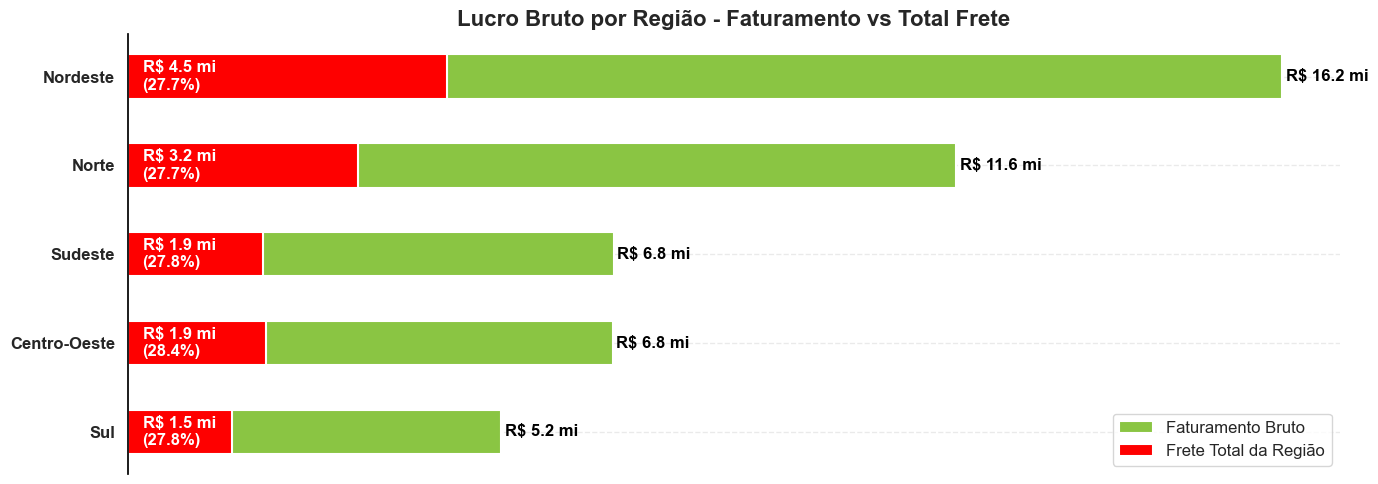

In [41]:
#Agrupando as regiões
df_regioes = df_comparativo_lucroXfrete.groupby('Regiao')[['Faturamento', 'Total Frete Regiao','Lucro Bruto (Fat - Frete)']].sum()
df_regioes.sort_values(by='Faturamento', inplace=True)

#Definição de tamanho, tema e cores
fig, ax = plt.subplots(figsize=(14, 5))
sns.set_theme(style='whitegrid')


#Plot e estilização
ax.barh(df_regioes.index, df_regioes['Faturamento'], label='Faturamento Bruto', color= cores[2], height=0.5, linewidth=1.5)
ax.barh(df_regioes.index, df_regioes['Total Frete Regiao'], label='Frete Total da Região', color=cores[5], height=0.5, linewidth=1.5)

ax.set_title('Lucro Bruto por Região - Faturamento vs Total Frete', fontsize=16, fontweight='bold')
ax.set_xlabel('')
ax.set_xticks([])
ax.set_ylabel('')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(12)

ax.legend(fontsize=12)
ax.grid(True, axis='y', linestyle='--', alpha=0.4)

for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')

for i in range(len(df_regioes)):
    frete = df_regioes.iloc[i]['Total Frete Regiao']
    faturamento = df_regioes.iloc[i]['Faturamento']

    frete_milhoes = frete / 1e6
    faturamento_milhoes = faturamento / 1e6

    percentual_frete = (frete / faturamento) * 100 if faturamento != 0 else 0

    # Valor do frete (à esquerda da barra) com porcentagem
    ax.text(0 + 200000, i,
            f"R$ {frete_milhoes:,.1f} mi\n({percentual_frete:.1f}%)", 
            va='center', ha='left', fontsize=12, color='white', fontweight='bold')

    # Valor do faturamento total (à direita da barra)
    ax.text(faturamento + 50000, i,
            f"R$ {faturamento_milhoes:,.1f} mi", 
            va='center', ha='left', fontsize=12, color='black', fontweight='bold')



plt.tight_layout()
plt.show()

#### Comprometimento de frete no faturamento
Atualmente, **cerca de 28% do faturamento bruto é destinado aos custos logísticos de frete e entrega**. Embora esteja dentro do planejado, o cenário econômico instável exige atenção redobrada. Estratégias de otimização devem ser consideradas, principalmente no Centro-Oeste, que apresenta baixo faturamento, mas o maior custo proporcional de frete.

## Relatório Final

Com base em nossa análise de vendas e faturamento, identificamos alguns pontos-chave que impactam diretamente a performance do e-commerce:
- A maior parte do faturamento vem de produtos usados, representando cerca de 86% da receita.
- Poucos produtos e marcas concentram a maior parcela do faturamento, enquanto grande parte do catálogo tem baixa saída.
- A região Nordeste é responsável por aproximadamente 35% das vendas, demonstrando forte aderência do público local.
- O custo logístico de frete consome cerca de 28% do faturamento bruto, com destaque para o Centro-Oeste como a região de maior impacto proporcional.

***Esses insights mostram um perfil de vendas concentrado, forte presença regional e a necessidade de atenção especial aos custos logísticos.***

## Recomendações

- Realizar campanhas específicas para o público do Nordeste, adaptando a linguagem e ofertas às preferências regionais.
- Revisar o mix de produtos disponíveis, focando em itens de alta conversão e estudando as razões da baixa venda de determinadas marcas.
- Aplicar pesquisas rápidas (ex: questionários no site ou e-mail) para entender os motivos de desistência de compra em determinadas marcas ou produtos.
- Avaliar estratégias para reduzir o custo de frete no Centro-Oeste, como novos parceiros logísticos ou centros de distribuição regionais.
- Investir em promoções e incentivos para a venda de produtos novos, buscando diversificar a receita e reduzir a dependência de itens usados.

Esperamos que essas recomendações apoiem decisões estratégicas para potencializar o faturamento, reduzir custos e ampliar o alcance do e-commerce.

#### Na sequência deste projeto, será desenvolvida uma dashboard gerencial no Power BI para oferecer ao time de gestão comercial uma visão dinâmica e contínua dos principais indicadores de desempenho que poderá ser acessada no link (a colocar).

